In [24]:
import pandas as pd
#Зчитування датасету за посиланням
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
#1. Вивести перших 5 рядків.
df = tables[2]
df.head()

Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022

In [25]:
#2. Визначити розмір датасета
df.shape

(210, 7)

In [26]:
df.columns

MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )

In [27]:
curr_col = [( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')]
new_col = ['Country',
           'IMF_Forecast',
           'IMF_Year',
           'WorldBank_Estimate',
           'Worldbank_Year',
           'UN_Estimate',
           'UN_Year']
#4, 3. Змінити назви стовпців на більш зручні, наприклад Country MVF_2024 WorldBank_2023 OON_2022
# Визначити оптимальну кількість стовпців.
df.columns = new_col
df.head(6)

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,Worldbank_Year,UN_Estimate,UN_Year
0,World,109529216,2024,105435540,2023,100834796,2022
1,United States,28781083,2024,27360935,2023,25744100,2022
2,China,18532633,[n 1]2024,17794782,[n 3]2023,17963170,[n 1]2022
3,Germany,4591100,2024,4456081,2023,4076923,2022
4,Japan,4110452,2024,4212945,2023,4232173,2022
5,India,3937011,2024,3549919,2023,3465541,2022


In [28]:
sel_cols = {
    'IMF_Forecast' : 'MVF_2024',
    'WorldBank_Estimate' : 'WorldBank_2023',
    'UN_Estimate' : 'OON_2022'
}
df1 = df[['Country'] + list(sel_cols.keys())]
df = df1.rename(columns=sel_cols)
df.head()

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216,105435540,100834796
1,United States,28781083,27360935,25744100
2,China,18532633,17794782,17963170
3,Germany,4591100,4456081,4076923
4,Japan,4110452,4212945,4232173


In [29]:
#5. Визначити тип даних.
print("Data types of each row:\n", df.dtypes)

Data types of each row:
 Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


In [30]:
#Перевірити наявність пропущених значень.
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [31]:
df.replace('-', float('nan'), inplace = True)
df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors = 'coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors = 'coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors = 'coerce')
print("\n After convertation:\n", df.dtypes)
df.head()


 After convertation:
 Country            object
MVF_2024          float64
WorldBank_2023    float64
OON_2022          float64
dtype: object


,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0


In [32]:
#7. Ще раз перевірити наявність пропущених значень.
df.isnull().sum()

,0
Country,0
MVF_2024,15
WorldBank_2023,8
OON_2022,1


In [33]:
#6. Замініть у таблиці значення "—" на значення NaN. При наявності, замінити пропущені
#значення на середнє значення.
import numpy as np
df = df.replace({'-': np.NaN})
df = df.fillna(df.mean(numeric_only=True), axis = 0)
df.head(9)

,Country,MVF_2024,WorldBank_2023,OON_2022
0,World,109529216.0,105435540.0,100834796.0
1,United States,28781083.0,27360935.0,25744100.0
2,China,18532633.0,17794782.0,17963170.0
3,Germany,4591100.0,4456081.0,4076923.0
4,Japan,4110452.0,4212945.0,4232173.0
5,India,3937011.0,3549919.0,3465541.0
6,United Kingdom,3495261.0,3340032.0,3089072.0
7,France,3130014.0,3030904.0,2775316.0
8,Brazil,2331391.0,2173666.0,1920095.0


In [34]:
#Повторна перевірка
df.isnull().sum()

,0
Country,0
MVF_2024,0
WorldBank_2023,0
OON_2022,0


In [35]:
#8. Перевірити наявність дублікатів. При наявності видалити дублікати.
df_unique = df.drop_duplicates()
print(df_unique)

              Country     MVF_2024  WorldBank_2023     OON_2022
0               World  109529216.0     105435540.0  100834796.0
1       United States   28781083.0      27360935.0   25744100.0
2               China   18532633.0      17794782.0   17963170.0
3             Germany    4591100.0       4456081.0    4076923.0
4               Japan    4110452.0       4212945.0    4232173.0
..                ...          ...             ...          ...
205          Kiribati        311.0           279.0        223.0
206             Palau        308.0           263.0        225.0
207  Marshall Islands        305.0           284.0        279.0
208             Nauru        161.0           154.0        147.0
209            Tuvalu         66.0            62.0         59.0

[210 rows x 4 columns]


In [36]:
#9. Вивести описову статистику датасету describe()
descrip = df.describe()
print("Description:\n", descrip)

Description:
            MVF_2024  WorldBank_2023      OON_2022
count  2.100000e+02    2.100000e+02  2.100000e+02
mean   1.123228e+06    1.037206e+06  9.612699e+05
std    7.900707e+06    7.602076e+06  7.275608e+06
min    6.600000e+01    6.200000e+01  5.900000e+01
25%    1.464775e+04    1.044175e+04  8.928250e+03
50%    6.215800e+04    4.341600e+04  3.210250e+04
75%    4.366365e+05    3.376592e+05  2.412485e+05
max    1.095292e+08    1.054355e+08  1.008348e+08


In [37]:
#10. Визначте відхилення (різницю) між показниками MVF_2024 та
#WorldBank_2023 для кожної країни. У яких країнах ці показники
#найбільше відрізняються (дати відповідт)? ВІДПОВІДЬ: США
df['Difference'] = df['MVF_2024'] - df['WorldBank_2023']
Diff = df.loc[df['Country'] != 'World'].copy()
Diff = Diff.sort_values(by='Difference', key=abs, ascending=False).head(5)
print("Top 5 countries with the largest difference between IMF and World Bank estimates:")
print(Diff[['Country', 'MVF_2024', 'WorldBank_2023', 'Difference']])

Top 5 countries with the largest difference between IMF and World Bank estimates:
                      Country      MVF_2024  WorldBank_2023    Difference
1               United States  2.878108e+07      27360935.0  1.420148e+06
196  Turks and Caicos Islands  1.123228e+06          1402.0  1.121826e+06
193              Sint Maarten  1.123228e+06          1623.0  1.121605e+06
178                   Curaçao  1.123228e+06          3074.0  1.120154e+06
176                 Greenland  1.123228e+06          3236.0  1.119992e+06


In [38]:
# Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
#OON_2022. Які пари змінних мають найвищу кореляцію?
correlation_matrix = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print("Correlation matrix:\n", correlation_matrix)
max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr < 1].reset_index()
print("\nPairs of variables with the highest correlation:")
print(max_corr.head(1))

Correlation matrix:
                 MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.999351  0.999246
WorldBank_2023  0.999351        1.000000  0.999656
OON_2022        0.999246        0.999656  1.000000

Pairs of variables with the highest correlation:
          level_0   level_1         0
0  WorldBank_2023  OON_2022  0.999656


In [39]:
#.Обчисліть середнє значення для кожного стовпця (MVF_2024,
#WorldBank_2023, OON_2022).
mean_val = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print("Mean values for each column:\n", mean_val)

Mean values for each column:
 MVF_2024          1.123228e+06
WorldBank_2023    1.037206e+06
OON_2022          9.612699e+05
dtype: float64


In [40]:
#Обчисліть стандартне відхилення показників для кожної країни. Яка
#країна має найвищу варіативність у показниках між роками?
df = df[df['Country'] != 'World']
df['Std_Deviation'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
country_with_max_variability = df.loc[df['Std_Deviation'].idxmax()]
print("Country with the highest variability in estimates:")
print(country_with_max_variability[['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022', 'Std_Deviation']])

Country with the highest variability in estimates:
Country            United States
MVF_2024              28781083.0
WorldBank_2023        27360935.0
OON_2022              25744100.0
Std_Deviation     1519552.648063
Name: 1, dtype: object


<ipython-input-40-6dbbc658195f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Std_Deviation'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)


In [41]:
#Визначення країни з найвищим та найнижчим показниками: Знайдіть
#країну з найвищим та найнижчим показниками у кожному з років
#(MVF_2024, WorldBank_2023, OON_2022).
# Знаходимо країни з найвищими та найнижчими показниками для кожного з років
df = df[df['Country'] != 'World']
highest_mvf = df.loc[df['MVF_2024'].idxmax()]
lowest_mvf = df.loc[df['MVF_2024'].idxmin()]
highest_wb = df.loc[df['WorldBank_2023'].idxmax()]
lowest_wb = df.loc[df['WorldBank_2023'].idxmin()]
highest_oon = df.loc[df['OON_2022'].idxmax()]
lowest_oon = df.loc[df['OON_2022'].idxmin()]
print("Country with the highest MVF_2024:\n",highest_mvf[['Country', 'MVF_2024']])
print("\nCountry with the lowest MVF_2024:\n",lowest_mvf[['Country', 'MVF_2024']])
print("\nCountry with the highest WorldBank_2023:\n",highest_wb[['Country', 'WorldBank_2023']])
print("\nCountry with the lowest WorldBank_2023:\n",lowest_wb[['Country', 'WorldBank_2023']])
print("\nCountry with the highest OON_2022:\n",highest_oon[['Country', 'OON_2022']])
print("\nCountry with the lowest OON_2022:\n",lowest_oon[['Country', 'OON_2022']])

Country with the highest MVF_2024:
 Country     United States
MVF_2024       28781083.0
Name: 1, dtype: object

Country with the lowest MVF_2024:
 Country     Tuvalu
MVF_2024      66.0
Name: 209, dtype: object

Country with the highest WorldBank_2023:
 Country           United States
WorldBank_2023       27360935.0
Name: 1, dtype: object

Country with the lowest WorldBank_2023:
 Country           Tuvalu
WorldBank_2023      62.0
Name: 209, dtype: object

Country with the highest OON_2022:
 Country     United States
OON_2022       25744100.0
Name: 1, dtype: object

Country with the lowest OON_2022:
 Country     Tuvalu
OON_2022      59.0
Name: 209, dtype: object


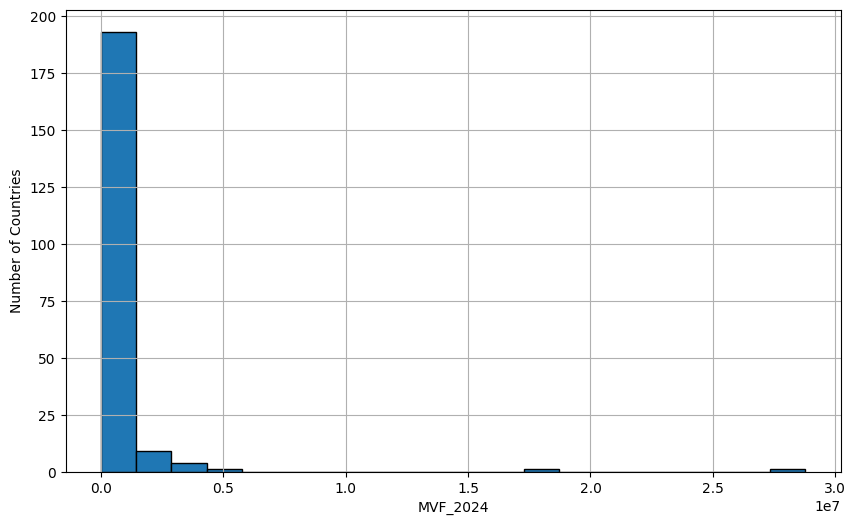

In [42]:
#Побудуйте гістограму для розподілу показників MVF_2024 серед всіх країн.
import matplotlib.pyplot as plt
df = df[df['Country'] != 'World']
plt.figure(figsize=(10, 6))
plt.hist(df['MVF_2024'], bins=20, edgecolor='black')
plt.xlabel('MVF_2024')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()

In [43]:
#Розрахуйте частку кожної країни в загальному значенні для кожного
#року (MVF_2024, WorldBank_2023, OON_2022).#ВІДПОВІДЬ: ЧАСТКИ ЗБІЛЬШУЮТЬСЯ
df = df[df['Country'] != 'World']
total_imf = df['MVF_2024'].sum()
total_wb = df['WorldBank_2023'].sum()
total_un = df['OON_2022'].sum()
df['IMF_Share'] = df['MVF_2024'] / total_imf
df['WorldBank_Share'] = df['WorldBank_2023'] / total_wb
df['UN_Share'] = df['OON_2022'] / total_un
print("Share of each country in the total IMF Estimate:\n",df[['Country', 'MVF_2024', 'IMF_Share']])
print("\nShare of each country in the total World Bank Estimate:\n",df[['Country', 'WorldBank_2023', 'WorldBank_Share']])
print("\nShare of each country in the total UN Estimate:\n",df[['Country', 'OON_2022', 'UN_Share']])

Share of each country in the total IMF Estimate:
               Country    MVF_2024     IMF_Share
1       United States  28781083.0  2.277911e-01
2               China  18532633.0  1.466786e-01
3             Germany   4591100.0  3.633677e-02
4               Japan   4110452.0  3.253263e-02
5               India   3937011.0  3.115991e-02
..                ...         ...           ...
205          Kiribati       311.0  2.461444e-06
206             Palau       308.0  2.437700e-06
207  Marshall Islands       305.0  2.413956e-06
208             Nauru       161.0  1.274252e-06
209            Tuvalu        66.0  5.223643e-07

[209 rows x 3 columns]

Share of each country in the total World Bank Estimate:
               Country  WorldBank_2023  WorldBank_Share
1       United States      27360935.0     2.434729e-01
2               China      17794782.0     1.583479e-01
3             Germany       4456081.0     3.965270e-02
4               Japan       4212945.0     3.748914e-02
5               I

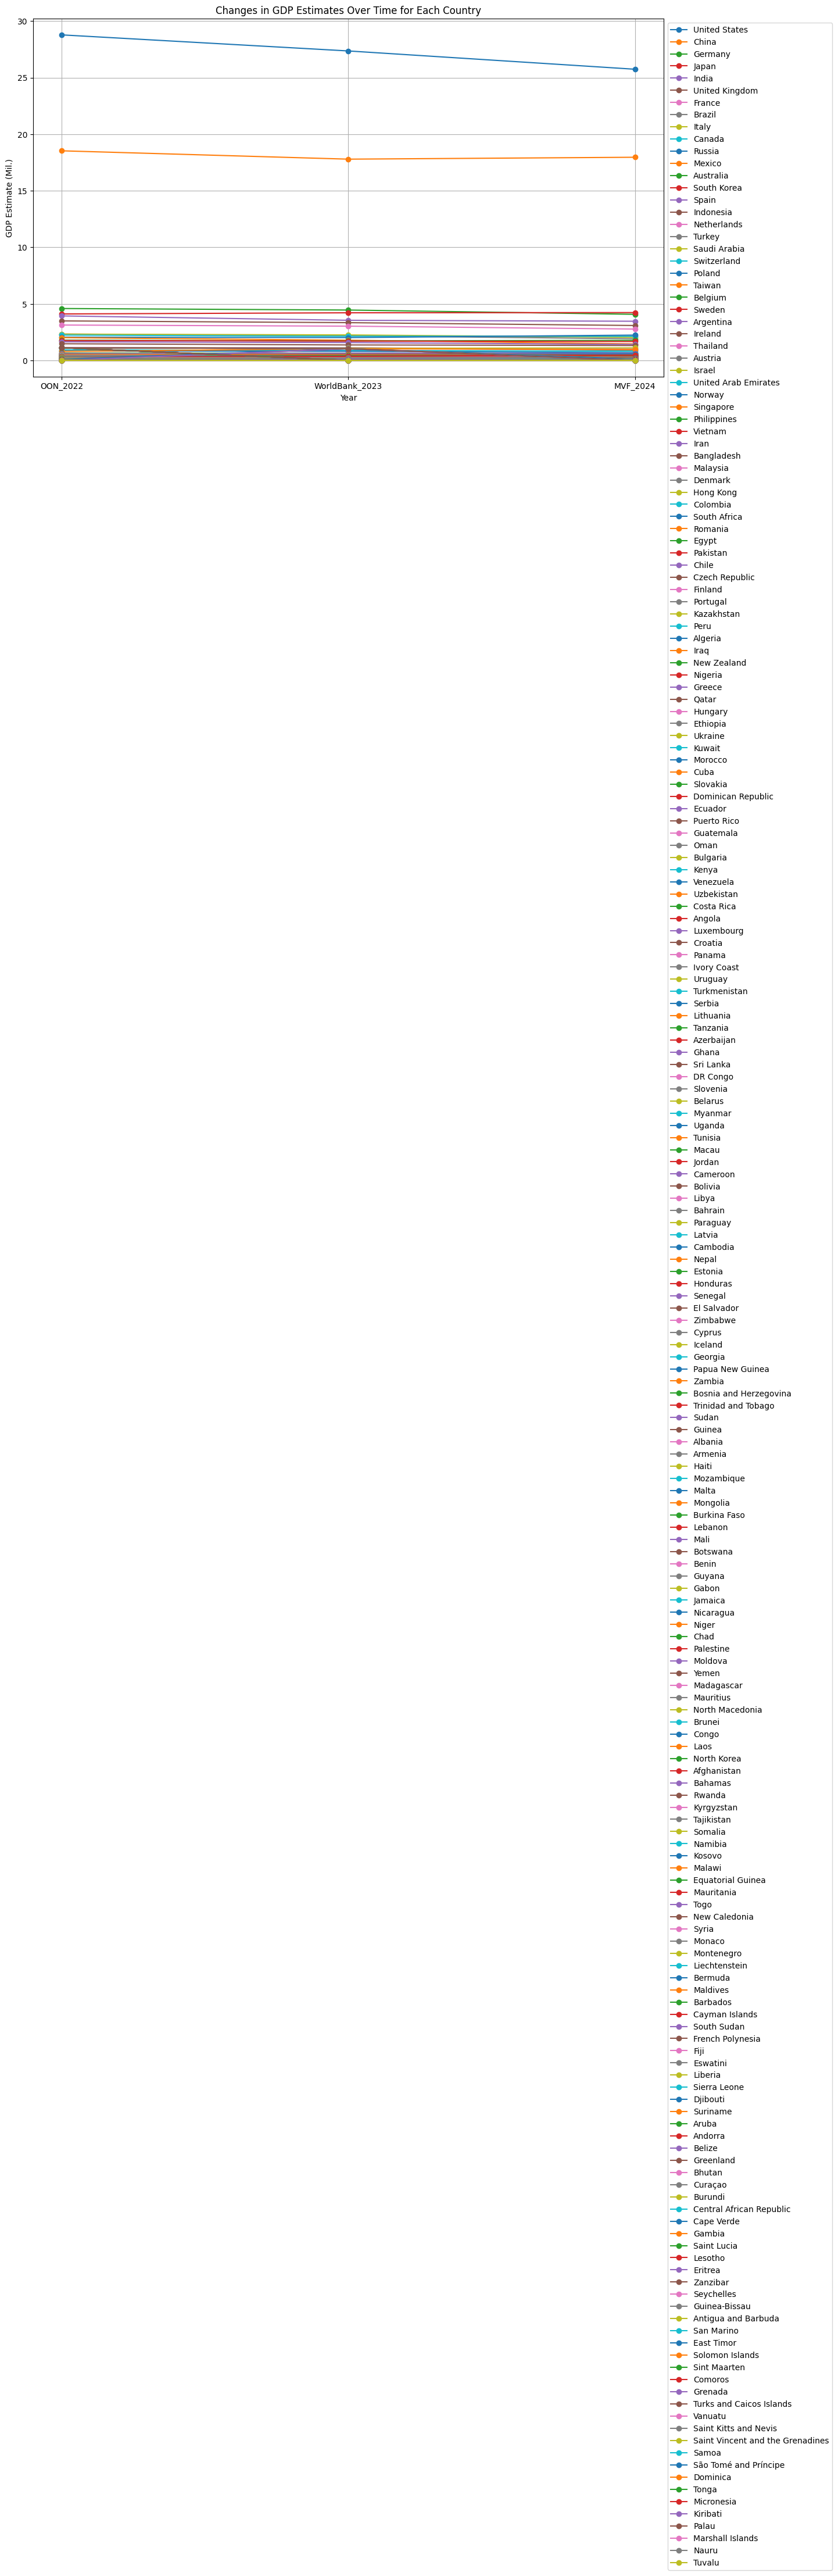

In [44]:
#Візуалізуйте зміни в показниках для кожної країни за три роки на
#графіку. ВІДПОВІДЬ: Індія та Китай демонструють стабільне зростання свойого ВВП, тоді як Венесуела - спадання.
df = df[['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']]
df = df.dropna(subset=['MVF_2024', 'WorldBank_2023', 'OON_2022'])
df['MVF_2024'] = df['MVF_2024'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['WorldBank_2023'] = df['WorldBank_2023'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['OON_2022'] = df['OON_2022'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['MVF_2024'] /= 10**6
df['WorldBank_2023'] /= 10**6
df['OON_2022'] /= 10**6
df = df[df['Country'] != 'World']
years = ['OON_2022', 'WorldBank_2023', 'MVF_2024']
plt.figure(figsize=(14, 8))
for index, row in df.iterrows():
    y_values = row[1:]
    country = row['Country']
    plt.plot(years, y_values, marker='o', label=country)
plt.title('Changes in GDP Estimates Over Time for Each Country')
plt.xlabel('Year')
plt.ylabel('GDP Estimate (Mil.)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=1)
plt.grid(True)
plt.show()

**Висновок**:
Під час виконання завдань я здійснив низку аналізів даних про ВВП країн за різними оцінками. Спочатку було перевірено наявність дублікатів і проведено очистку даних. Використовуючи методи Pandas, були розраховані відхилення між оцінками МВФ, Світового банку та ООН, визначено країни з найбільшими розбіжностями, а також обчислено кореляції між різними показниками. Проаналізував середні значення та стандартне відхилення для кожної країни, що дозволило виявити країни з найвищою варіативністю між роками. Окремо визначено країни з найвищими та найнижчими показниками за кожним із років. Були побудовані візуалізації для розподілу показників та їх змін з часом, що дозволило побачити динаміку та тренди, зокрема країни зі стабільним зростанням чи спадом, розрахувалась частка кожної країни в загальному значенні ВВП і візуалізувались ці зміни.

**Завдання 2**

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
#1. Вивести перших 5 рядків.
file_path = '/content/drive/My Drive/titanic.csv'
dft = pd.read_csv(file_path)
dft.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
#2. Визначити розмір датасета
dft.shape

(418, 12)

In [48]:
#3. Визначити тип даних.
print("Data types of each row:\n", dft.dtypes)

Data types of each row:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [49]:
#Визначити наявність пропущених значень
dft.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [50]:
#4. Визначити наявність пропущених значень. При наявності, замінити
#пропущені значення на середнє значення.
dft = dft.replace({'-': np.NaN})
dft = dft.fillna(dft.mean(numeric_only=True), axis = 0)
dft.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
#8. Видалити стовпчик Cabin
dft.drop('Cabin', axis = 1, inplace=True)

In [52]:
#5. Перевірка
dft.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [53]:
#9. Сформувати датасет з обраними стовпцями:
#['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
dft = dft[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
dft.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [54]:
#6. Перевірити наявність дублікатів. При наявності видалити дублікати.
dft_unique = dft.drop_duplicates()
print(dft_unique)

     Survived  Pclass     Sex       Age      Fare
0           0       3    male  34.50000    7.8292
1           1       3  female  47.00000    7.0000
2           0       2    male  62.00000    9.6875
3           0       3    male  27.00000    8.6625
4           1       3  female  22.00000   12.2875
..        ...     ...     ...       ...       ...
411         1       1  female  37.00000   90.0000
412         1       3  female  28.00000    7.7750
414         1       1  female  39.00000  108.9000
415         0       3    male  38.50000    7.2500
417         0       3    male  30.27259   22.3583

[372 rows x 5 columns]


In [55]:
#7. Вивести описову статистику датасету describe()
descrip = dft.describe()
print("Description:\n", descrip)

Description:
          Survived      Pclass         Age        Fare
count  418.000000  418.000000  418.000000  418.000000
mean     0.363636    2.265550   30.272590   35.627188
std      0.481622    0.841838   12.634534   55.840500
min      0.000000    1.000000    0.170000    0.000000
25%      0.000000    1.000000   23.000000    7.895800
50%      0.000000    3.000000   30.272590   14.454200
75%      1.000000    3.000000   35.750000   31.500000
max      1.000000    3.000000   76.000000  512.329200


In [56]:
#10.Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні
#значення даного стовпчика).
dft['Sex'] = dft['Sex'].replace({'female':1,'male':0}).astype(int)
dft.dtypes

<ipython-input-56-2e8c186d963e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft['Sex'] = dft['Sex'].replace({'female':1,'male':0}).astype(int)


,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
Fare,float64


In [57]:
dft.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


In [58]:
# Перевірка унікальних значень.
print('Unique values in "Sex" column:', dft['Sex'].unique())

Unique values in "Sex" column: [0 1]


In [59]:
#11.Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає)
dft.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [60]:
#12. Вивести 5 перших рядків датасету.
dft.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


In [61]:
#13. Вивести 5 останніх рядків датасету.
dft.tail()

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,30.27259,8.0500
414,1,1,1,39.00000,108.9000
415,0,3,0,38.50000,7.2500
416,0,3,0,30.27259,8.0500
417,0,3,0,30.27259,22.3583


In [62]:
#14. Аналіз виживання залежно від статі: Обчисліть відсоток виживання
#для кожної статі. Чи була різниця у виживанні між чоловіками та
#жінками?
surv = dft.groupby('Sex')['Survived'].mean() * 100
print(surv)
#ВІДПОВІДЬ: НІХТО З ЧОЛОВІКІВ НЕ ВИЖИВ.

Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


In [63]:
#15. Обчисліть відсоток виживання для кожного класу (Pclass). Який
#клас мав найвищий рівень виживання (дати відповідь)?
surv_class = dft.groupby('Pclass')['Survived'].mean()*100
print(surv_class)
#ВІДПОВІДЬ: У ПЕРШГО КЛАСУ БУЛА ПЕРЕВАГА У ВИЖИВАННІ. ДРУГИЙ ТА ТРЕТІЙ КЛАС ПРИБЛИЗНО РІВНІ.#

Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


In [64]:
#16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
#впливає вік на виживання (дати відповідь)?
surv_age = dft.groupby('Survived')['Age'].mean()
print(surv_age)
#ВІДПОВІДЬ: РІЗНИЦЯ МІНІМАЛЬНА. ВИЖИВАННЯ НЕ ЗАЛЕЖИТЬ ВІД ВІКУ.

Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64


In [66]:
# 17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і
#обчисліть рівень виживання для кожної групи. Як тариф впливав на
#шанси виживання (дати відповідь)?
fare_bins = [0, 10, 20, 30, 100, 600]
fare_labels = ['0-10', '10-20', '20-30', '30-100', '100+']
dft['Fare_Group'] = pd.cut(dft['Fare'], bins=fare_bins, labels=fare_labels)
surv_fare = dft.groupby('Fare_Group')['Survived'].mean() * 100
print(surv_fare)
#ВІДПОВІДЬ: ЧИМ БІЛЬШИЙ ТАРИФ, ТИМ БІЛЬША ЙМОВІРНІСТЬ ВИЖИВАННЯ.

Fare_Group
0-10      27.450980
10-20     31.707317
20-30     40.845070
30-100    45.569620
100+      61.290323
Name: Survived, dtype: float64


<ipython-input-66-b72908c5a537>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_fare = dft.groupby('Fare_Group')['Survived'].mean() * 100


In [68]:
#18. # Обчислення середнього тарифу (Fare) для кожного класу (Pclass). Чи існує значна різниця у тарифах між класами (дати
#відповідь)?
average_fare_class = dft.groupby('Pclass')['Fare'].mean()
print(average_fare_class)
#ВІДПОВІДЬ: ЗНАЧНА РІЗНИЦЯ МІЖ ПЕРШИМ ТА ДРУГИМ/ТРЕТІМ КЛАСОМ. НЕВЕЛИКА РІЗНИЦЯ МІЖ ТАРИФАМИ ДРУГОГО ТА ТРЕТЬОГО КЛАСІВ.

Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


In [69]:
#19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
#пасажирів розподіляється за класами (дати відповідь)?
average_fare_age = dft.groupby('Pclass')['Age'].mean()
print(average_fare_age)
#ВІДПОВІДЬ: ПАСАЖИРИ ПЕРШОГО КЛАСИ БУЛИ ПЕРЕВАЖНО ЛЮДИ СЕРЕДНЬГО ВІКУ. МОЛОДШІ ПАСАЖИРИ ЗДЕБІЛЬШОГО НАДАВАЛИ ПЕРЕВАГУ ДРУГОМУ ТА ТРЕТЬОМУ КЛАСАМ.

Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


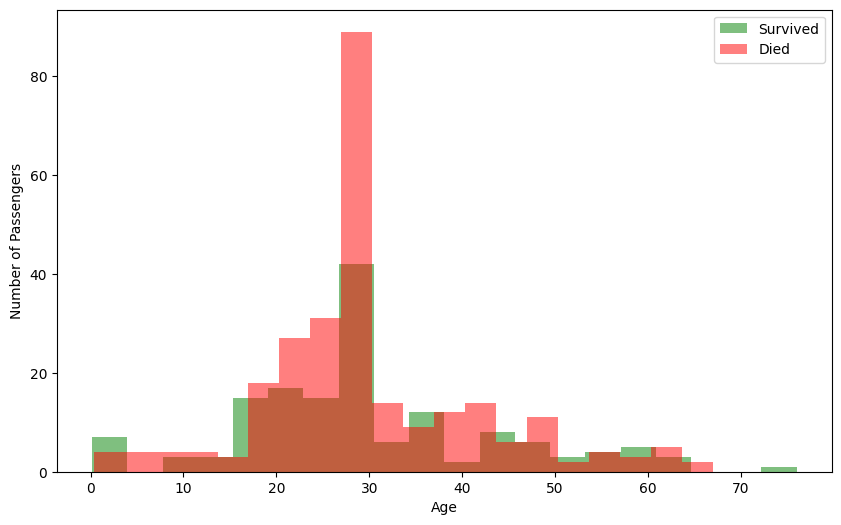

In [71]:
#20. Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто
#не вижив. Чи є видимі відмінності у вікових групах (дати
#відповідь)?
survived_age = dft[dft['Survived'] == 1]['Age']
not_survived_age = dft[dft['Survived'] == 0]['Age']
plt.figure(figsize=(10, 6))
plt.hist(survived_age, bins=20, alpha=0.5, label='Survived', color='green')
plt.hist(not_survived_age, bins=20, alpha=0.5, label='Died', color='red')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()
#ВІДПОВІДЬ: ЗДЕБІЛЬШОГО ПОМЕРАЛИ ТА ВИЖИВАЛИ ПАСАЖИРИ У ВІКОКВОМУ ПРОМІЖКУ ВІД 15 ДО 30 РОКІВ.

In [72]:
#21. Обчисліть відсоток виживання для кожної комбінації статі та класу
#(наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група
#мала найвищий рівень виживання (дати відповідь)?
survival_gender_class = dft.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print(survival_gender_class)
#ВІДПОВІДЬ: УСІ ХТО ВИЖИВ - ЖІНКИ.

Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64


In [74]:
# 22. Обчисліть кореляцію між усіма числовими змінними (Survived,
#Pclass, Age, Fare). Які змінні найбільш сильно корелюють з
#виживанням (дати відповідь)?
numer_col = ['Survived', 'Pclass', 'Age', 'Fare']
correl_mat = dft[numer_col].corr()
print(correl_mat)
#ВІДПОВІДЬ: НАЙБІЛЬШЕ НА ВИЖИВАННЯ ВПЛИВАЄ ЗМІННА Pclass - ПАСАЖИРИ ВИЩОГО КЛАСУ МАЛИ БІЛЬШЕ ШАНСІВ ВИЖИТИ.

          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000


Висновок:
Отже, перш за все, стать відігравала вирішальну роль: жінки мали значно вищий відсоток виживання, ніж чоловіки. Також було виявлено, що пасажири першого класу мали набагато вищі шанси на виживання порівняно з пасажирами другого і третього класів. Високий тариф також позитивно впливав на їхні шанси вижити.
Середній вік тих, хто вижив, був дещо нижчим порівняно з тими, хто не вижив, що свідчить про те, що молодші пасажири мали трохи вищі шанси на порятунок. Аналіз комбінацій статі та класу показав, що жінки у вищих класах мали найбільші шанси вижити, тоді як чоловіки в нижчих класах — найменші. Клас пасажира, тариф і вік мають різні ступені впливу на ймовірність виживання, причому клас пасажира виявився найбільш впливовим фактором.